#  Athena Flux and Counts Determination

This program determines the flux sensitivity in a given energy band for a given instrument of the Athena X-ray mission as a function of exposure time

Authors: F.J. Carrera, S. Martínez-Núñez

**Athena Community Office**  
**Instituto de Física de Cantabria (CSIC-UC)**  
Funded by Agencia Estatal de Investigación, Unidad de Excelencia María de Maeztu, ref. MDM-2017-0765  
Funded by the Spanish Ministry MCIU under project RTI2018-096686-B-C21 (MCIU/AEI/FEDER, UE), co-funded by FEDER funds.  

![logos](logos/logos_small.png)

>__LICENSE__: This is free software: you can redistribute it and/or modify it under the terms of the  
>GNU General Public License as published by the Free Software Foundation, either version  
>3 of the License, or any later version. This software is distributed in the hope that it  
>will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of  
>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  
>See the GNU General Public License for more details.  
>For a copy of the GNU General Public License see <http://www.gnu.org/licenses/>.

## Input Parameters:

* __rmffile__ (str): Filename with full path of the response file for the source spectrum  
* __arffile__ (str): Filename with full path of the auxiliary matrix file for the source spectrum  
* __bgdfile__ (str): Filename with full path of sum background spectrum that it includes all components  
* __HEW__ (float): HEW of the PSF in arcsec (default 5.7, WFI Field of View average for on-axis HEW=5 arcsec, for X-IFU or WFI on axis use 5 arcsec)  
* __fHEW__ (float): Extraction radius for the source in units of fraction of the HEW (default=1.0)   
* __bgdArea__ (float): Backtround extraction area (arcsec2, default 78.54)  
* __prob__ (float): Detection significance for limits (default=1-1e6)  
* __Emin__ (float): Lower bound of the energy interval (keV, default 2.0)  
* __Emax__ (float): Upper bound of the energy interval (keV, default 10.0)  
* __NHGal__ (float): Foreground Galactic column density (1e22 cm-2, default 0.018)  
* __NH__ (float): Column density (1e22cm-2, default 0.020)  
* __Gamma__ (float): Power law photon index (default 2.0)  
* __z__ (float): Redshift (default 0)  
* __tmin__ (float): Minimum value of the exposure time (s; default=1e2)  
* __tmax__ (float): Maximum value of the exposure time (s; default=1e8)  
* __nt__ (int): Number of exposure time values to explore (default=100)  
* __SXlim__ (float): Confusion flux hard limit (cgs, default 2.e-17 appropriate for 0.5-2 keV, for 2-10 keV use instead 1.21e-16 -James Aird, private communication-). This limit is a conservative assumption for the limit achieved over the entire field-of-view in the 0.5-2keV band. Different limits should be adopted depending on the desired sensitivity. 
* __outfile__ (str): Filename with the output exposure time and flux limits (default 'outfile.txt')  
* __pngfile__ (str): Filename with a plot with the above values (default 'pngfile.png')  

## Processing steps:
    
   1. Importing libraries  
   2. Defining input parameters, derived parameters and Xspec parameters  
   3. Gettting background count rate in the reference band normalized to the source area  
   4. Determining counts, flux (cgs units - erg cm-2 s-1 -), confusion flux (cgs), optimum extraction flux (cgs) & optimum extraction radius (arcsec) in the reference band over a loop of exposure times  
   5. Output file with results: the information provided by the outpufile comprises: Time_s, Flux_cgs, Flux_confusion_cgs, FluxOptimumExtraction_cgs & RadiusOptimumExtraction_arcsec  
   6. Plotting limiting sensitivity vs exposure time.  
      
## Running the notebook from the command line

To run this notebook from the command line, use the script <code>execute_notebook.py</code>:

  1. Install ``papermill`` (https://papermill.readthedocs.io/en/latest/)  
  2. Select the apropriate parameters in the script  ``execute_notebook_inpars.py`` or read them from the command line using ``execute_notebook_outpars.py``  
  3. Run in command line  
       <code> > python execute_notebook_inpars.py </code>  
      or  
      <code> > python execute_notebook_outpars.py --rmffile my.rmf --arffile my.arf --bgdfile my.bgdfile ...... </code>  
   

### Examples:

   1. Athena/WFI point source, FoV-averaged (0.5-2 keV): 
    
    ``> python execute_notebook_outpars.py --rmffile athena_wfi_rib2.3_B4C_20210218_wo_filter_FovAvg.rsp``  
    ``--arffile " " --bgdfile athena_wfi_rib2.3_B4C_20210329_bkgd_sum_psf_wo_filter_FovAvg.pha --HEW 5.7``  
    ``--fHEW 0.67 --bgdArea 78.54 --prob 0.999999 --Emin 0.5 --Emax 2.0 --NHGal 0.018 --NH 0.020 ``  
    ``--Gamma 2.0 --z 6.0 --tmin 1e2 --tmax 1e8 --nt 100 --SXlim 2.0e-17 ``  
    ``--outfile FluxvsTexp_bgd_WFI_05_2keV.topcat --pngfile FluxvsTexp_bgd_WFI_05_2keV.png``  
    
  
   2. Athena/WFI point source on-axis (2-10 keV):
    
    ``> python execute_notebook_outpars.py --rmffile athena_wfi_rib2.3_B4C_20210218_wo_filter_OnAxis.rsp``  
    ``--arffile " " --bgdfile athena_wfi_rib2.3_B4C_20210329_bkgd_sum_psf_wo_filter_OnAxis.pha --HEW 5.7``  
    ``--fHEW 0.67 --bgdArea 78.54 --prob 0.999999 --Emin 2.0 --Emax 10.0 --NHGal 0.018 --NH 0.020 ``  
    ``--Gamma 2.0 --z 6.0 --tmin 1e2 --tmax 1e8 --nt 100 --SXlim 1.21e-16 ``  
    ``--outfile FluxvsTexp_bgd_WFI_2_10keV.topcat --pngfile FluxvsTexp_bgd_WFI_2_10keV.png``   
    
    
   3. Athena/X-IFU point source (0.5-2 keV):
    
    ``> python execute_notebook_outpars.py --rmffile XIFU_CC_BASELINECONF_2018_10_10.rmf ``  
    ``--arffile XIFU_CC_BASELINECONF_2018_10_10.arf ``  
    ``--bgdfile Total_pointsources_XIFU_CC_BASELINECONF_2018_10_10.pha --HEW 5.7``  
    ``--fHEW 0.67 --bgdArea 78.54 --prob 0.999999 --Emin 0.5 --Emax 2.0 --NHGal 0.018 --NH 0.020 ``  
    ``--Gamma 2.0 --z 6.0 --tmin 1e2 --tmax 1e8 --nt 100 --SXlim 2.0e-17 ``  
    ``--outfile FluxvsTexp_bgd_XIFU_05_2keV.topcat --pngfile FluxvsTexp_bgd_XIFU_05_2keV.png``   
    
    
### Instruments files (response matrices and background files): 
    
   * Athena/WFI: https://www.mpe.mpg.de/ATHENA-WFI/response_matrices.html
   * Athena/X-IFU: http://x-ifu.irap.omp.eu/resources-for-users-and-x-ifu-consortium-members
    

### References for XSPEC

   * XSPEC quick tutorial https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/quick.html  
   * XSPEC extended tutorial https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/extended.html  
   * XSPEC class reference https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/classes.html  
   * XSPEC python interface documentation https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/PyXspec.pdf  


# Importing libraries

In [1]:
import sys
import argparse
import datetime

import numpy as np
from scipy.optimize import root,minimize_scalar
from matplotlib import pyplot as plt
import matplotlib as mpl
from enclosed_energy_fraction import eef
from getModel import getModelCR, getModelFlux, getModelLum
from stats import gammainc_here
from SXdet import SXdet_f

from xspec import *

# Initial Status and output definition

In [81]:
progname = "Athena_Xray_flux_vs_expTime"
start=datetime.datetime.now()
strstart=start.strftime("%d/%m/%Y:%H:%M:%S")
print('\n\n Starting Athena_Xray_Flux_vs_expTime at {}\n\n'.format(strstart))



 Starting Athena_Xray_Flux_vs_expTime at 09/06/2021:15:45:16




# Parameter values

Parameters: they can be modified in command line or in external python script

## Default parameters

In [1]:
rmffile = None  # Filename with full path of the response file for the source spectrum
arffile = None  # Filename with full path of the auxiliary matrix file for the source spectrum
bgdfile = None  # Filename with full path of background spectrum
HEW = 5.7        # HEW of the PSF in arcsec
fHEW = 0.67      # Extraction radius for the source in units of fraction of the HEW
bgdArea = 78.54  # Background extraction area (arcsec2)
prob = 0.999999  # Detection probability for limits (default=1-1e6, [0,1])
Emin = 2.0       # Lower bound of the energy interval (keV)
Emax = 10.0      # Upper bound of the energy interval (keV)
NHGal = 0.018    # Foreground Galactic column density (1e22 cm-2)
NH = 0.020       # Column density (1e22cm-2)
Gamma = 2.0      # Power law photon index 
z = 0.           # Redshift 
tmin = 1.e2      # Minimum value of the exposure time (s)
tmax = 1.e8      # Maximum value of the exposure time (s)
nt = 100         # Number of exposure time values to explore
SXlim = 1.21e-16 # Confusion flux limit (cgs)
outfile = 'outfile.txt' # Filename with the output exposure time and flux limits
pngfile = 'pngfile.png'    # Filename with a plot with the above values 

## Derived parameters

In [94]:
norm=1.0
radius=fHEW*HEW 
sourceArea=np.pi*radius**2
EEF=eef(radius,HEW)

print('\n\n Source extraction radius={} arcsec  EEF={}'.format(radius,EEF))



 Source extraction radius=3.8190000000000004 arcsec  EEF=0.7119482355759181


## Xspec parameters

Definition of Xspec parameters: console chatter level; log chatter level; abundance table; set cosmological values; set the photoelectric absorption cross-section to bcmc; add a key - value pair of strings to XSPEC's internal database; xAxis units for plotting; and plotting device 

In [3]:
# initialize XSPEC parameters
Xset.chatter=0
Xset.logChatter=0

Xset.abund="angr"
Xset.cosmo="70 0 0.73"
Xset.xsect="bcmc"
Xset.addModelString("APECROOT","3.0.9")

Plot.device='/NULL'
Plot.xAxis='keV'

# Background count rate 

Gets background count rate in the reference band normalized to the source area

In [4]:
AllData.clear()
AllModels.clear()
print("bgdfile=", bgdfile)
s1 = Spectrum(bgdfile)
str_min = "**-" + str(Emin)
str_max = str(Emax) + "-**"
s1.ignore(str_min)
s1.ignore(str_max)
(net_rate, net_rate_var, total_rate, model_rate) = s1.rate
expos = s1.exposure

CRbgd=total_rate*sourceArea/bgdArea
print('\n\nBackground countrate={}, normalized to source area={}'.format(total_rate,CRbgd))

AllData.clear()
AllModels.clear()

bgdfile= None


Exception: Error: Data file name is required.

# Count rates and fluxes for the default model

Using model <code> pha * zpha * zpow </code> calculate cont rate and flux in the selected energy band

In [5]:
model='pha*zpha*zpow'

intervalsCR=[[Emin,Emax]]
pars=[NHGal,NH,z,Gamma,z,norm]
CR1=getModelCR(AllModels,AllData,model,pars,rmffile,arffile,intervalsCR)[0]
print('\n\n Countrate for unit normalization (ct/s) CR1={}'.format(CR1))

intervalsFlux=[[Emin,Emax]]
pars=[0.0,NH,z,Gamma,z,norm]
SX1=getModelFlux(AllModels,model,pars,intervalsFlux)[0]
print('\n\nFlux for unit normalization (cgs) SX={} '.format(SX1))

NameError: name 'norm' is not defined

# Flux calculation 

For different exposure times, calculate:  
__SXdet__: detection flux  
__SXdetconf__: detection flux taking into account the input confusion limit  
__SXopt__: detection flux using the extraction region that maximises the signal-to-noise ratio  
__ropt__: radius of a circular extraction region that would maximise the signal-to-noise-ratio  

In [6]:
ts=np.logspace(np.log10(tmin),np.log10(tmax),num=nt)
#print(ts)
SXdets=[]
SXdetconfs=[]
SXopts=[]
ropts=[]
for t in ts:
    SXdet=SXdet_f(fHEW,t,HEW,total_rate,bgdArea,CR1,SX1,prob)
    SXdetconf=max(SXdet,SXlim)
    SXdets.append(SXdet)
    SXdetconfs.append(SXdetconf)
   
    optim=minimize_scalar(SXdet_f,bounds=(0.5,1.5),method='bounded',
                          args=(t,HEW,total_rate,bgdArea,CR1,SX1,prob))
    fopt=optim.x
    ropt=HEW*fopt
    SXopt=optim.fun
    ropts.append(ropt)
    SXopts.append(SXopt)    

    print('   t={:.1f}s SX={:10.4e} cgs SXconf={:10.4e} cgs'.format(t,SXdet,SXdetconf))
    print('        Optimal values: Fraction of the HEW={:5.3f} Extraction radius (arcsec)={:6.3f} Flux sensitivity (cgs)={:9.3e}\n'.format(fopt,ropt,SXopt))

NameError: name 'total_rate' is not defined

# Writing results

Output file is created with columns:

<code> Time_s  Flux_cgs  Flux_confusion_cgs FluxOptimumExtraction_cgs RadiusOptimumExtraction_arcsec </code>

__Time_s__: exposure time in s  
__Flux_cgs__: detection flux in cgs units (erc cm-2 s-1)  
__Flux_confusion_cgs__: detection flux taking into account the input confusion limit in cgs units (erc cm-2 s-1)  
__FluxOptimumExtraction_cgs__: detection flux using the extraction region that maximises the signal-to-noise ratio in cgs units (erc cm-2 s-1)  
__RadiusOptimumExtraction_arcsec__: the radius of a circular extraction region that would maximise the signal-to-noise-ratio, in arcsec   

In [7]:
SXdets=np.array(SXdets)
SXdetconfs=np.array(SXdetconfs)
SXopts=np.array(SXopts)
ropts=np.array(ropts)
np.savetxt(outfile,np.c_[ts,SXdets,SXdetconfs,SXopts,ropts],comments='#',
           header=' Time_s  Flux_cgs  Flux_confusion_cgs FluxOptimumExtraction_cgs RadiusOptimumExtraction_arcsec',
           fmt=' %9.1f  %9.3e  %9.3e  %9.3e %6.3f') 
print('\n\n {} fluxes written out to file {}'.format(nt,outfile))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 0

# Creating plot

Plot produced: limiting sensitivity vs exposure time

PNG output file created


NameError: name 'progname' is not defined

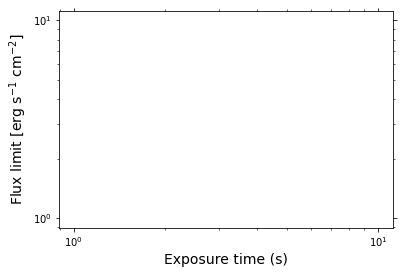

In [8]:
mpl.rc('xtick',top=True)
mpl.rc('xtick.minor',top=True)
mpl.rc('ytick',right=True)
mpl.rc('ytick.minor',right=True)
#
fig=plt.figure()
plt.axes(xscale='log',yscale='log')
plt.xlabel('Exposure time (s)',fontsize=14)
plt.ylabel('Flux limit [erg s$^{-1}$ cm$^{-2}$]', fontsize=14)
plt.title(progname + " " + strstart,fontsize=14)
plt.plot(ts,SXdets,'k-', label="Det. limit", linewidth=2)
plt.plot(ts,SXdetconfs,'r--', label="Det. limit + confusion", linewidth=2)
plt.plot(ts,SXopts,'g:', label="Det. limit optimal extraction", linewidth=2)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.savefig(pngfile)
print('\n\nPlot of limiting sensitivity vs exposure time written out to {}'.format(pngfile))       

In [101]:
end=datetime.datetime.now()
strend=end.strftime("%d/%m/%Y:%H:%M:%S")
elapsed=end-start

print('\n\n Finished {} at {}\n   Elapsed time: {}\n\n'.format(progname,strend,elapsed))




 Finished Athena_Xray_flux_vs_expTime at 09/06/2021:15:49:51
   Elapsed time: 0:04:35.316999


